So far we have learned how to do Talor expansions near $x = 0$.

But in many applications, $0$ is an uninteresting point.

We want to apply Talor expansion at an arbitrary point $a$.

## Definition of the Talor series of $f(x)$ at $x = a$

$
\begin{equation}
\begin{split}
f(x) &= \sum_{k=0}^{\infty} \frac{f^{(k)}(a)}{k!}(x - a)^k \\
&= f(a) + \frac{df}{dx}|_a(x-a) + \frac{1}{2!} \frac{d^2f}{dx^2}|_a(x-a)^2 + \frac{1}{3!} \frac{d^3f}{dx^3}|_a(x-a)^3 + ...
\end{split}
\end{equation}
$

Let $h = x - a$, we have

$
\begin{equation}
\begin{split}
f(x) &= f(h + a) \\
&= \sum_{k=0}^{\infty} \frac{f^{(a)}(k)}{k!}(h)^k \\
&= f(a) + \frac{df}{dx}|_a h + \frac{1}{2!} \frac{d^2f}{dx^2}|_a h^2 + \frac{1}{3!} \frac{d^3f}{dx^3}|_a h^3 + ...
\end{split}
\end{equation}
$


### Example: Compute the Taylor series of $\ln x$ about $x = 1$.

$k$ | $\frac{d^k}{dx^k} \ln x$| $\frac{d^k}{dx^k} \ln x|_{x=1}$
---| --- | ---
$0$ | $\ln x$ | $0$
$1$ | $x^-1$ | $1$
$2$ | $- x^{-2}$ | $-1$
$3$ | $2x^{-3}$ | $2$
$4$ | $-6x^{-4}$ | $-6$
$5$ | $24x^{-5}$ | $24$

#### Proof by induction
We have already seen $\frac{d^m}{dx^m} \ln x = (-1)^{m + 1} (m - 1)!x^{-m}$ applies when $0 \leq m \leq 5$

For a natural number $m$ if $\frac{d^m}{dx^m} \ln x = (-1)^{m + 1} (m - 1)!x^{-m}$

Then $\frac{d^{m + 1}}{dx^{m + 1}} \ln x = (-1)^{m + 1} (-m) (m - 1)!x^{-(m+1)} = (-1)^{(m + 1) + 1} ((m + 1) - 1))!x^{-(m+1)}$

Hence for any natural number $k$ we have

$
\begin{equation}
\frac{d^k}{dx^k} \ln x = (-1)^{k + 1} (k - 1)!x^{-k}
\end{equation}
$

Hence

$
\begin{equation}
\frac{d^k}{dx^k} \ln x |_{x=1} = (-1)^{k + 1} (k - 1)!
\end{equation}
$

Hence the Taylor expansion of $\ln x$ at $x = 1$ is

$
\begin{equation}
\begin{split}
\ln x &= (x - 1) - \frac{1}{2} (x - 1)^2 + \frac{1}{3} (x - 1)^3 - \frac{1}{4} (x - 1)^4 + ... \\
&= \sum_{k=1}^{\infty} (-1)^{k + 1} \frac{(x - 1)^k}{k}
\end{split}
\end{equation}
$

Let $h = x - 1$.

$
\begin{equation}
\begin{split}
\ln x &= \ln (h + 1) \\
&= h - \frac{1}{2} h^2 + \frac{1}{3} h^3 - \frac{1}{4} h^4 + ... \\
&= \sum_{k=1}^{\infty} (-1)^{k + 1} \frac{h^k}{k}
\end{split}
\end{equation}
$


### Remind that Taylor polynomials approximate well only on the domain of convergence

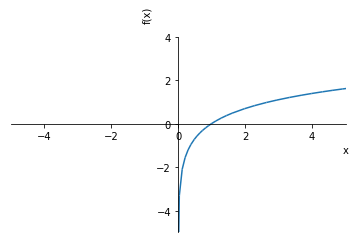

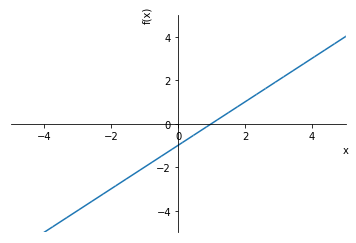

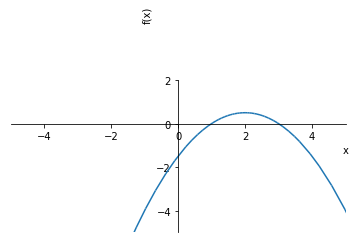

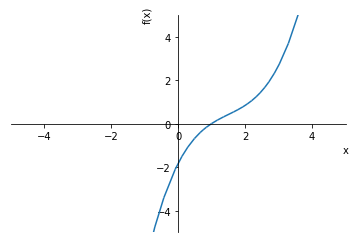

In [24]:
%matplotlib inline

from sympy import init_printing, ln, symbols, diff, plot

init_printing()

x = symbols('x')

ln_plot = plot(ln(x), xlim=(-5, 5), ylim=(-5, 5))

first_term_plot = plot(x - 1, xlim=(-5, 5), ylim=(-5, 5))

second_term_plot = plot((x - 1) - (x - 1) ** 2 / 2, xlim=(-5, 5), ylim=(-5, 5))

third_term_plot = plot((x - 1) - (x - 1) ** 2 / 2 + (x - 1)** 3 / 3 , xlim=(-5, 5), ylim=(-5, 5))

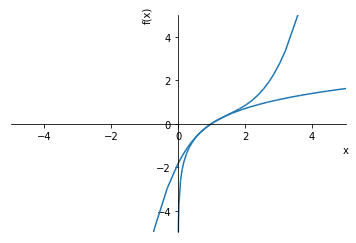

In [25]:
%matplotlib inline

ln_plot.append(third_term_plot[0])

ln_plot.show()

The Taylor series of $\ln x$ of $x = 1$ only approximate well when $0 < x < 2$.

### Principle: successive polynomial truncation approximate increasingly well

The expansion point matters!

If you are approximating near the point of interest, you can approximate quickly with fewer terms.


#### Example: estimate $\sqrt{10}$

Let's compute the Taylor series of $\sqrt{x}$ at $x = a$.

$
\begin{equation}
\sqrt{x} = \sqrt{a} + \frac{1}{2\sqrt{a}} (x - a) - \frac{1}{8\sqrt{a^3}} (x - a)^2 + H.O.T.
\end{equation}
$

Then we have for the Taylor series at about $x = 1$

$
\begin{equation}
\sqrt{x} = 1 + \frac{1}{2} (x - 1) - \frac{1}{8} (x - 1)^2 + H.O.T.
\end{equation}
$

Hence

$
\begin{equation}
\sqrt{10} = 1 + \frac{9}{2} - \frac{81}{8} + H.O.T.
\end{equation}
$

So how good estimation is that?

In [29]:
from math import sqrt

sqrt(10)

In [30]:
1 + 9/2 - 81/8

The estimation is poor.

So what if we compute $\sqrt{10}$ by the Taylor expansion about $x = 9$?

$
\begin{equation}
\sqrt{x} = 3 + \frac{1}{6} (x - 9) - \frac{1}{216} (x - 9)^2 + H.O.T.
\end{equation}
$

In [33]:
3 + 1/6 * (10 - 9) - 1/216 * (10 - 9) ** 2

### Taylor expansion points of function composition

For $f \circ g$, you about expand $g$ about $x$, and $f$ about $g(x)$.

#### Example: Compute the Taylor series of $e^{\cos x}$ about $x = 0$

We will need to expand $\cos x$ at $x = 0$, hence $e^{\cos x}$ at $\cos 0 = 1$.

The Taylor expansion of $\cos x$ at $x = 0$ will be

$
\begin{equation}
\cos x = 1 - \frac{1}{2!} x^2 + \frac{1}{4!} x^4 - \frac{1}{6!} x^6 + ...
\end{equation}
$

And let $u = \cos x$, the Taylor expansion of $e^{u}$ at $u = 1$ will be

$
\begin{equation}
e^{u} = e + e (u - 1) + \frac{1}{2!} e (u - 1)^2 + \frac{1}{3!} e (u - 1)^3 + ...
\end{equation}
$

Substitute $u$ back by $\cos x$ we have the Taylor expansion of $e^{\cos x}$ at $x = 0$

$
\begin{equation}
\begin{split}
e^{\cos x} &= e + e (\cos x - 1) + \frac{1}{2!} e (\cos x - 1)^2 + \frac{1}{3!} e (\cos x - 1)^3 + ... \\
&= e (1 + (\cos x - 1) + (\cos x - 1)^2 + (\cos x - 1)^3 + ...) \\
&= e e^{\cos x - 1}\\
\end{split}
\end{equation}
$
